# Predicción del porcentaje de adiciones en tiempo y valor
## Investigación Doctoral
### Heriberto Felizzola Jimenez

__Objetivo:__ Desarrollar un modelo de regresión para predecir el porcentaje de adiciones en tiempo y valor para cada hospital público. El propósito del modelo es identificar se pueden aprender patrones para predecir estos indicadores, con lo cual se pueda determinar si su valor obedece a un comportamiento sistemático.
__Metodología:__ 
* Ingeniería de Variables: 
    * Variables del SECOP 
    * Variables de terridata
    * Indicadores de riesgo de corrupción (modelo IMCO)
* Preprocesamiento de datos
* Determinar hyperparametros para los modelos de machine learning
* Ajuste de los modelos
  * Regresión Lineal
  * Ridge
  * Lasso
  * Arboles
  * Random Forest
  * Gradient Boosting (Extreme Gradient Boosting)
  * Redes Neuronales
* Validación de los modelos con $R^2$ y $RMSE$
* Análisis de resultados

### Configuración del Entorno de Trabajo

In [1]:
# Montar drive in colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Configurar el directorio de trabajo
import os
os.chdir('/content/drive/MyDrive/Doctorado/Investigacion Doctoral/Codigos')

## 1. Importar librerias y cargar datos

In [3]:
# Importar librerias desarrollar para configurar datos y entrenar modelos
import SetData # Modulo creado para preprocesar datos
from RegressionModels import OLSRegression, RidgeRegression, LassoRegression, CARTRegressor, RandForestRegressor, XgbRegressor, NNETRegressor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipynb.
sns.set(color_codes=True)

In [4]:
data = SetData.load_data()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 66 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   orden                                                                                                           850 non-null    object 
 1   dep                                                                                                             850 non-null    object 
 2   total_contratos                                                                                                 850 non-null    int64  
 3   valor_total                                                                                                     850 non-null    int64  
 4   valor_mediana                               

## 2. Preprocesamiento

In [5]:
# Extraer conjuntos de entrenamiento
X_train, X_test, y_train, y_test = SetData.preprocess(data, y_pred='perc_adic_valor')

## 3. Modelos de Regresión



Validation model with train data
     Rsquare: 0.36
     Mean Square Error: 62.38
     Root Mean Square Error: 7.90

Validation model with test data
     Rsquare: -0.21
     Mean Square Error: 117.05
     Root Mean Square Error: 10.82
--------------------------------------------------------------------------------

Análisis de las predicciones y los residuales


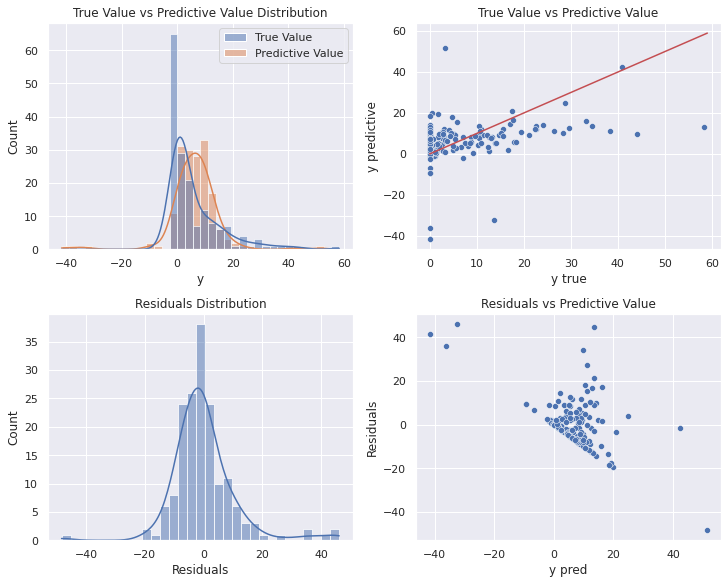

In [6]:
ols_model, ols_coef = OLSRegression(X_train, y_train, X_test, y_test, plot_test=True)

### 3.1 Modelo de Regresión Ordinaria

### 3.2 Modelo Ridge

A continuación se presentan los resultados del entrenamiento del modelo ridge:


--------------------------------------------------------------------------------
Model Parameter
     Alpha: 1.80

Validation model with train data
     Rsquare: 0.33
     Mean Square Error: 65.14
     Root Mean Square Error: 8.07

Validation model with test data
     Rsquare: 0.10
     Mean Square Error: 86.62
     Root Mean Square Error: 9.31
--------------------------------------------------------------------------------

Análisis de las predicciones y los residuales


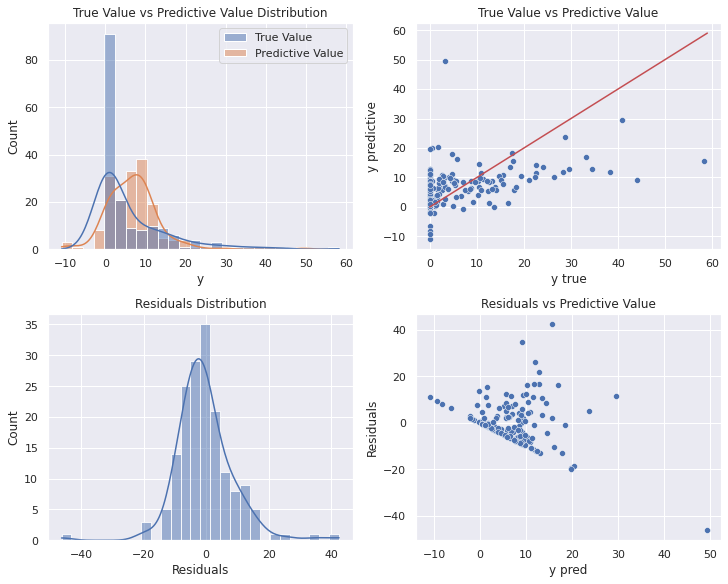

In [7]:
ridge_model, ridge_coef = RidgeRegression(X_train, y_train, X_test, y_test, alphas=10**np.linspace(5,-5,100)*0.5, plot_test=True)

### 3.3. Modelo Lasso

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.637257048249012, tolerance: 5.51966275804615
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.633504897195962, tolerance: 5.51966275804615
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.86805184070545, tolerance: 5.51966275804615
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase

--------------------------------------------------------------------------------
Model Parameter
     Alpha: 0.14

Validation model with train data
     Rsquare: 0.28
     Mean Square Error: 70.36
     Root Mean Square Error: 8.39

Validation model with test data
     Rsquare: 0.15
     Mean Square Error: 82.25
     Root Mean Square Error: 9.07
--------------------------------------------------------------------------------

Análisis de las predicciones y los residuales


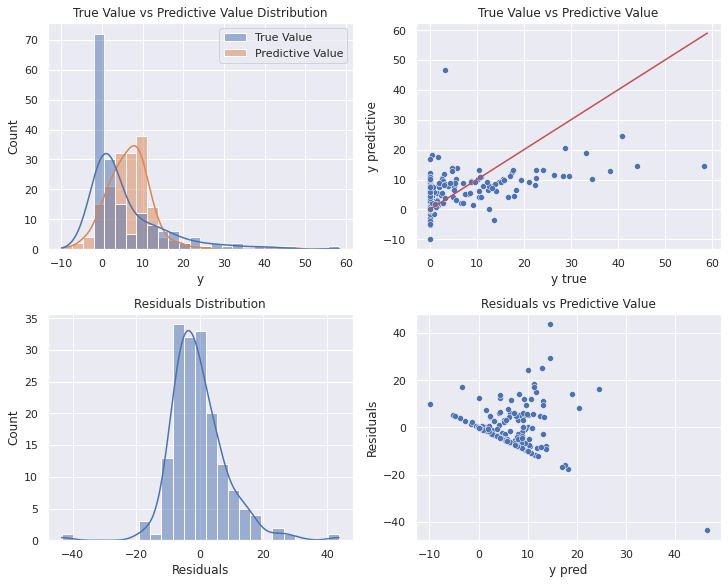

In [8]:
lasso_model, lasso_coef = LassoRegression(X_train, y_train, X_test, y_test, alphas=10**np.linspace(5,-5,100)*0.5, plot_test=True)

### 3.4 Arboles de Decisión

--------------------------------------------------------------------------------
Model Parameter: 

<bound method BaseEstimator.get_params of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')>

Validation model with train data
     Rsquare: 0.25
     Mean Square Error: 72.53
     Root Mean Square Error: 8.52

Validation model with test data
     Rsquare: 0.28
     Mean Square Error: 69.27
     Root Mean Square Error: 8.32
--------------------------------------------------------------------------------

Análisis de las predicciones y los residuales


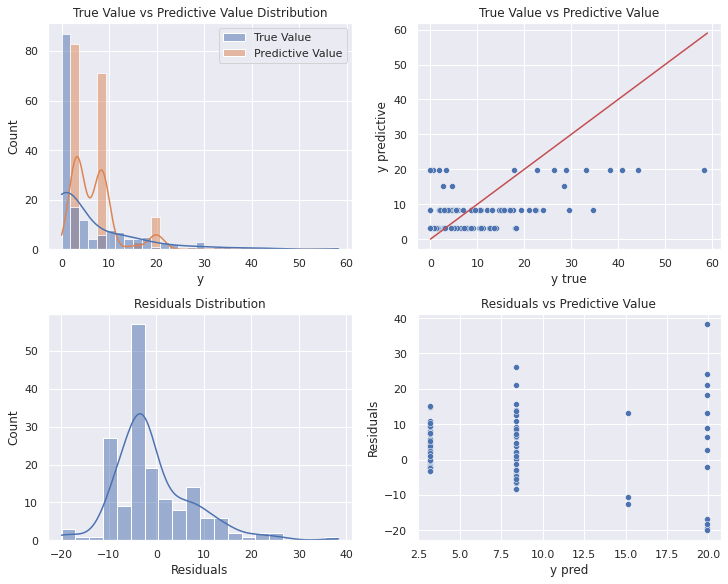

In [9]:
cart_model = CARTRegressor(X_train, y_train, X_test, y_test, plot_test=True)

### 3.4 Random Forest

--------------------------------------------------------------------------------
Model Parameter: 

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>

Validation model with train data
     Rsquare: 0.55
     Mean Square Error: 43.78
     Root Mean Square Error: 6.62

Validation model with test data
     Rsquare: 0.24
     Mean Square Error: 73.86
     Root Mean Square Error: 8.59
--------------------------------------------------------------------------------

Análisis de las predicciones y los residuales


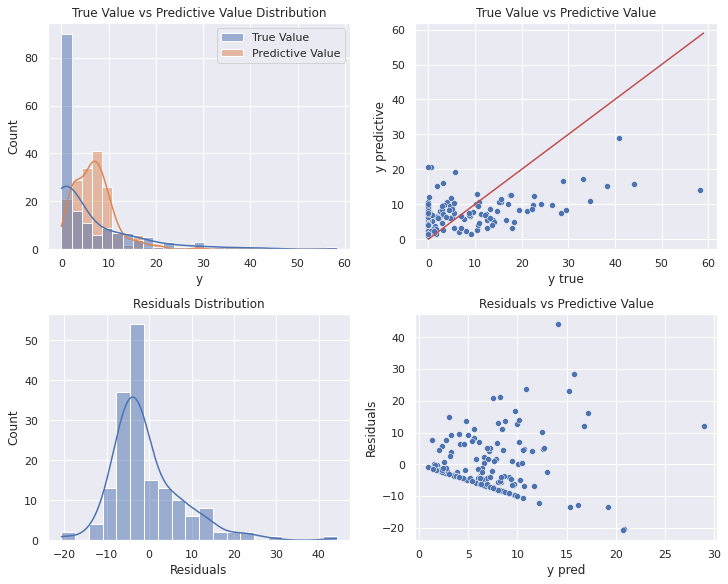

In [10]:
rf_parameter=dict(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                  max_depth=6, max_features=3, max_leaf_nodes=None,
                  max_samples=None, min_impurity_decrease=0.0,
                  min_impurity_split=None, min_samples_leaf=1,
                  min_samples_split=2, min_weight_fraction_leaf=0.0,
                  n_estimators=1000, n_jobs=None, oob_score=False,
                  random_state=None, verbose=0, warm_start=False)
rf_model = RandForestRegressor(X_train, y_train, X_test, y_test, plot_test=True, hyper_tunning=False, parameter=rf_parameter)

### 3.5 Extreme Gradient Boosting

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   10.1s finished


--------------------------------------------------------------------------------
Model Parameter: 

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)>

Validation model with train data
     Rsquare: 0.42
     Mean Square Error: 56.67
     Root Mean Square Error: 7.53

Validation model with test data
     Rsquare: 0.25
     Mean Square Error: 72.91
     Root Mean Square Error: 8.54
--------------------------------------------------------------------------------

Análisis de las predicciones y los residuales


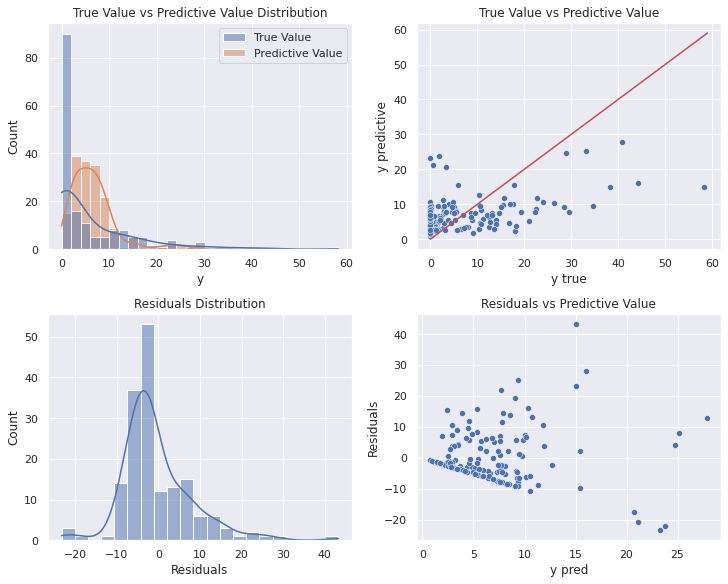

In [11]:
xgb_model = XgbRegressor(X_train, y_train, X_test, y_test, hyper_tunning=True, plot_test=True)

### 3.6 Neural Network

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


--------------------------------------------------------------------------------
Model Parameter: 

<bound method BaseEstimator.get_params of MLPRegressor(activation='logistic', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)>

Validation model with train data
     Rsquare: 0.72
     Mean Square Error: 26.90
     Root Mean Square Error: 5.19

Validation model with test data
     Rsquare: 0.18
     Mean Square Error: 79.26
     Root Mean Square Error: 8.90
--------------------------------------------------------------------------------

Análisis de las pred

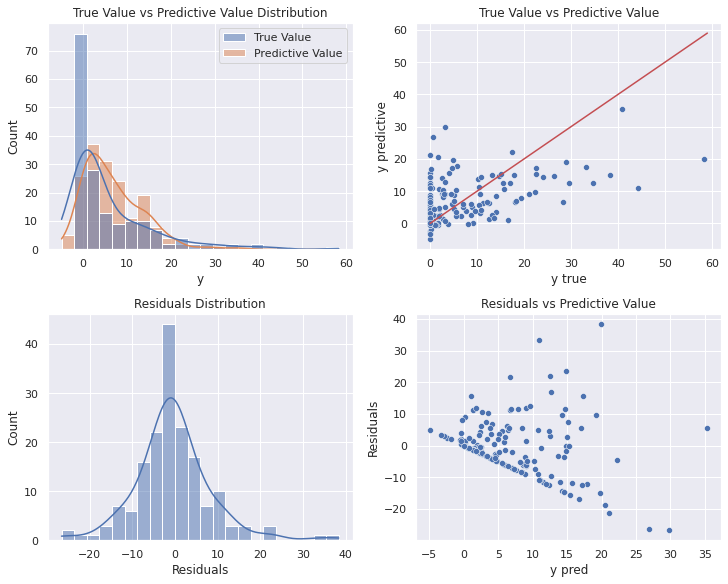

In [12]:
nnet_parameter = dict(activation='logistic', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
net_model = NNETRegressor(X_train, y_train, X_test, y_test, parameter=nnet_parameter, hyper_tunning=False, plot_test=True)

In [1]:
18000+16000+16000

50000